# Investigating the effect of residual connection

This notebook contains the implementation of investigating the effect of residual connection reported in Section 4.2 of our paper.

Code for running the experiments is in `residual_mlp_matching.py`. Running script is `residual_mlp.sh`.

In [1]:
import sys
sys.path.append('..')

## Visualize results

In [2]:
import matplotlib.pyplot as plt
import torch
import numpy as np

resmlp_res = torch.load('resmlp_wm_results.pth', weights_only=True)
mlp_res = torch.load('mlp_wm_results.pth', weights_only=True)

In [3]:
num_runs = 5
resmlp_mid_acc_s = [resmlp_res[run]['lmc_stat'][:, 1] for run in range(num_runs)] # list of tensors
resmlp_wm_mid_acc_s = [resmlp_res[run]['lmc_wm_stat'][:, 1] for run in range(num_runs)]
mlp_mid_acc_s = [mlp_res[run]['lmc_stat'][:, 1] for run in range(num_runs)]
mlp_wm_mid_acc_s = [mlp_res[run]['lmc_wm_stat'][:, 1] for run in range(num_runs)]

In [4]:
# calculate mean and std
resmlp_mid_acc_mean = torch.stack(resmlp_mid_acc_s).mean(dim=0).numpy()
resmlp_mid_acc_std = torch.stack(resmlp_mid_acc_s).std(dim=0).numpy()
resmlp_wm_mid_acc_mean = torch.stack(resmlp_wm_mid_acc_s).mean(dim=0).numpy()
resmlp_wm_mid_acc_std = torch.stack(resmlp_wm_mid_acc_s).std(dim=0).numpy()
mlp_mid_acc_mean = torch.stack(mlp_mid_acc_s).mean(dim=0).numpy()
mlp_mid_acc_std = torch.stack(mlp_mid_acc_s).std(dim=0).numpy()
mlp_wm_mid_acc_mean = torch.stack(mlp_wm_mid_acc_s).mean(dim=0).numpy()
mlp_wm_mid_acc_std = torch.stack(mlp_wm_mid_acc_s).std(dim=0).numpy()

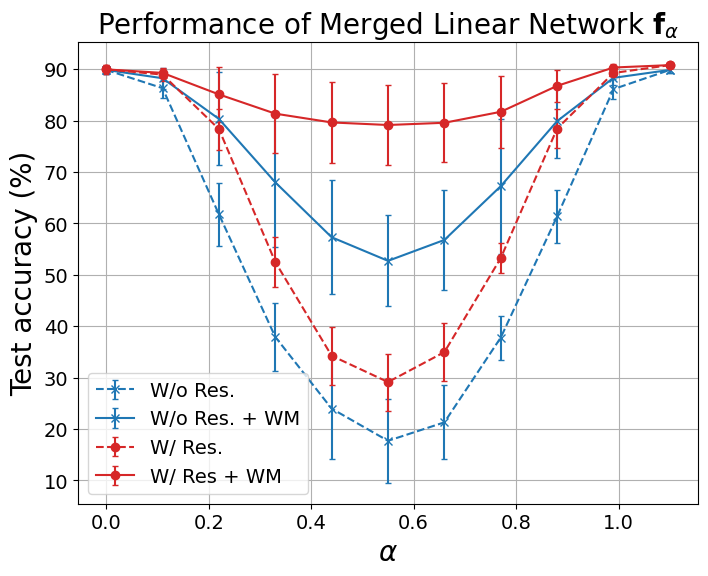

In [5]:
# plot
plt.figure(figsize=(8, 6))
plt.rcParams.update({'font.size': 14})
x_s = np.linspace(0, 1.1, 11)
plt.errorbar(x_s, mlp_mid_acc_mean, yerr=mlp_mid_acc_std, label='W/o Res.', fmt='x', capsize=2, linestyle='--', color='tab:blue')
plt.errorbar(x_s, mlp_wm_mid_acc_mean, yerr=mlp_wm_mid_acc_std, label='W/o Res. + WM', fmt='x', capsize=2, linestyle='-', color='tab:blue')
plt.errorbar(x_s, resmlp_mid_acc_mean, yerr=resmlp_mid_acc_std, label='W/ Res.', fmt='o', capsize=2, linestyle='--', color='tab:red')
plt.errorbar(x_s, resmlp_wm_mid_acc_mean, yerr=resmlp_wm_mid_acc_std, label='W/ Res + WM', fmt='o', capsize=2, linestyle='-', color='tab:red')

plt.legend()
plt.xlabel(r'$\alpha$', fontsize=20)
plt.ylabel('Test accuracy (%)', fontsize=20)
plt.title('Performance of Merged Linear Network '+r'$\mathbf{f}_{\alpha}$', fontsize=20)
plt.grid(True)